# 4a

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def matrix_add(X,Y):
    row, col = X.shape
    result = np.zeros((row,col))
    for i in range(len(X)):  # iterate over rows
        for j in range(len(X[0])): # iterate over columns
            result[i][j] = X[i][j] + Y[i][j]

    return result
  

In [3]:
def PageRank(G, alpha):
    
    #get shape
    row, col = G.shape
    
    #initalize R
    R = row
    
    #create d
    d = np.zeros(row)
    
    
    #create P
    P = np.zeros((row,col))
    for j in range(col): #iterate over columns
        sum = 0;
        for i in range(row): #iterate over rows
            sum += G[i,j]
        if(sum == 0):
            d[j] = 1;
        for i in range(row):
            if(sum>0):
                P[i,j] = G[i,j] * 1/sum
    
    #print(P)
            
    #M = a (P + 1/R*e*d^T) + (1-a)(1/R)*e*e^T
    
    #dead end matrix
    dead_ends = np.zeros((row,col));
    
    for j in range(col): #iterate over columns
        if(d[j]==1):
            for i in range(row): #iterate over columns
                dead_ends[i,j] = 1/R;
            
    #print(dead_ends)
    #P_prime
    
    P_prime = matrix_add(P,dead_ends);
    
    #print(P_prime)
                
    #escaping cycles
    escaping_cycles = np.zeros((row,col));
    
    for j in range(col): #iterate over columns
        for i in range(row): #iterate over columns
            escaping_cycles[i,j] = 1/R;
    #print(escaping_cycles)
    
    #M = a * P_prime + (1-a) * escaping_cycles
    
    L_matrix = alpha * P_prime;
    #print(L_matrix)
    
    R_matrix = (1-alpha) * escaping_cycles;
    #print(R_matrix)
    
    M =  matrix_add(L_matrix, R_matrix)
    #print(M)
    
    #compute probability vector
    tol = pow(10,-8)
    
    p_0 = (1/R) * np.ones(row);
    #p_0 = [1/3,1/3,1/3,0,0,0]
    p_k_1 = p_0;
    
    it = 0 
    while(1):
        it = it + 1;
        p_k = M.dot(p_k_1)
        if max(np.abs(p_k - p_k_1)) < tol :
            break;
        p_k_1 = p_k;
            
    return (p_k,it)
    

    
    

In [4]:
#TESTING
G = np.array([[0,0,0,0,1,1],
              [1,0,1,1,0,0],
              [1,1,0,0,0,0],
              [0,1,0,0,0,1],
              [0,1,1,1,0,1],
              [0,0,0,0,0,0]]);

#print(G)


alpha = 0.75

p,it = PageRank(G,alpha)
print(p)
print(it)

[0.21643316 0.23190309 0.18080487 0.11005911 0.2191331  0.04166667]
24


# 4b

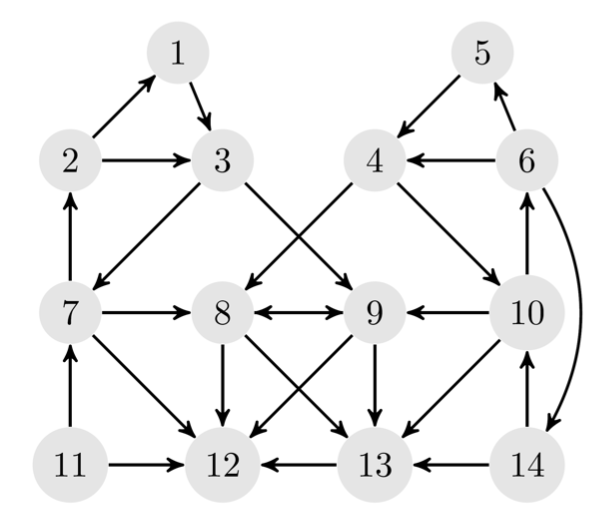

In [5]:
G = np.array([
              #1,2,3,4,5,6,7,8,9,0,1,2,3,4
              [0,1,0,0,0,0,0,0,0,0,0,0,0,0],#1
              [0,0,0,0,0,0,1,0,0,0,0,0,0,0],#2
              [1,1,0,0,0,0,0,0,0,0,0,0,0,0],#3
              [0,0,0,0,1,1,0,0,0,0,0,0,0,0],#4
              [0,0,0,0,0,1,0,0,0,0,0,0,0,0],#5
              [0,0,0,0,0,0,0,0,0,1,0,0,0,0],#6
              [0,0,1,0,0,0,0,0,0,0,1,0,0,0],#7
              [0,0,0,1,0,0,1,0,1,0,0,0,0,0],#8
              [0,0,1,0,0,0,0,1,0,1,0,0,0,0],#9
              [0,0,0,1,0,0,0,0,0,0,0,0,0,1],#10
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0],#11
              [0,0,0,0,0,0,1,1,1,0,1,0,1,0],#12
              [0,0,0,0,0,0,0,1,1,1,0,0,0,1],#13
              [0,0,0,0,0,1,0,0,0,0,0,0,0,0]#14
              ]);


alpha = 0.9
p,it = PageRank(G,alpha)

#print(p)

n = len(p)

p_index = np.zeros((n,2));

for i in range (n):
    p_index[i,0] = p[i]
    p_index[i,1] = (i+1)

columnIndex = 0
p_index_sorted = p_index[p_index[:,columnIndex].argsort()]

print("Vector of final pagerank scores (in ascending order of the node numbers)");
for i in range (n):
    print("rank:    "+str(p_index[i,0])+", node:    "+str(p_index[i,1]))
    
print("\nIndices of the pages in descending order of importance");
#print(p_index_sorted)
for i in range (n):
    print("rank:    "+str(p_index_sorted[n-1-i,0])+", node:    "+str(p_index_sorted[n-1-i,1]))


Vector of final pagerank scores (in ascending order of the node numbers)
rank:    0.03885065562404048, node:    1.0
rank:    0.03993066282801794, node:    2.0
rank:    0.07381624181441371, node:    3.0
rank:    0.06248823240722924, node:    4.0
rank:    0.03288854272837991, node:    5.0
rank:    0.04002228138757622, node:    6.0
rank:    0.06349600476968578, node:    7.0
rank:    0.09892554566300045, node:    8.0
rank:    0.10291725365437576, node:    9.0
rank:    0.06380140922637018, node:    10.0
rank:    0.020881858431836386, node:    11.0
rank:    0.21371780306657076, node:    12.0
rank:    0.11537496567012147, node:    13.0
rank:    0.03288854272837991, node:    14.0

Indices of the pages in descending order of importance
rank:    0.21371780306657076, node:    12.0
rank:    0.11537496567012147, node:    13.0
rank:    0.10291725365437576, node:    9.0
rank:    0.09892554566300045, node:    8.0
rank:    0.07381624181441371, node:    3.0
rank:    0.06380140922637018, node:    10.0
ra

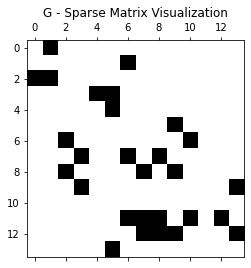

In [6]:
plt.title("G - Sparse Matrix Visualization")
plt.spy(G);

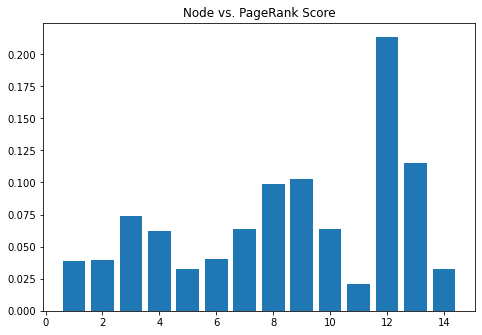

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
students = p
ax.bar(langs,students)
plt.title("Node vs. PageRank Score")
plt.show()

# 4c

In [8]:
from scipy import sparse

In [18]:


def PageRankSparse(Gcsr, alpha):

    #Create sparze matrix for P => Pcsr
    print(Gcsr);
    
    col_sum = Gcsr.sum(axis=0)
    
    R, R = Gcsr.shape
    
    Pcsr = sparse.csr_matrix(np.zeros((R,R)))
    
    print(Pcsr)
    
    print(col_sum);
    
    for i in range(R):
        if(col_sum[0,i]!=0):
            col_sum[0,i] = float(1/col_sum[0,i]);

        
    print(col_sum);
    
    P = np.zeros((R,R))

    for j in range(R):
        for i in range(R):
                if(Gcsr[i,j] == 1 and col_sum[0,j]!=0):
                    P[i,j] = (1/col_sum[0,j]);

    Pcsr = sparse.csr_matrix(P);
    
    d_t = np.zeros(R);
    for i in range(R):
        if(col_sum[0,i]==0):
            d_t[i] = 1;
    
    e = np.ones(R);
    p_n = (1/R) * e;
    
    tol = pow(10,-8)
    it = 0 

    while(1):
        it = it + 1;
        p_n_1 =  (( alpha * Pcsr.dot(p_n) ) + 
                  ( (alpha/R) * d_t.dot(p_n) * e ) + 
                  ( ((1-alpha)/R) * e ))
        
        if max(np.abs(p_n_1 - p_n)) < tol :
            break;
        p_n = p_n_1;
        
    return p_n_1, it


In [19]:
#TESTING
G = np.array([[0,0,0,0,1,1],
              [1,0,1,1,0,0],
              [1,1,0,0,0,0],
              [0,1,0,0,0,1],
              [0,1,1,1,0,1],
              [0,0,0,0,0,0]]);

Gcsr = sparse.csr_matrix(G);

alpha = 0.75
p, it = PageRankSparse(Gcsr,alpha)
print(p)
print(it)

  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1
  (3, 5)	1
  (4, 1)	1
  (4, 2)	1
  (4, 3)	1
  (4, 5)	1

[[2 3 2 2 1 3]]
[[0 0 0 0 1 0]]
[0.25925926 0.14814815 0.14814815 0.14814815 0.14814815 0.14814815]
9


In [11]:
[0.21643316 0.23190309 0.18080487 0.11005911 0.2191331  0.04166667]

SyntaxError: invalid syntax (3094421792.py, line 1)

# 4d

In [ ]:
import scipy.io
data = scipy.io.loadmat('bbc.mat')
Gcsr = data['G']
Gcsr = Gcsr.transpose() #data uses the reverse adjacency matrix convention.
U = data['U']

In [ ]:
plt.title("Gcsr - Sparse Matrix Visualization")
plt.spy(Gcsr);

In [ ]:

alpha = 0.9
p,it = PageRankSparse(Gcsr,alpha)

n = len(p)

p_index = np.zeros((n,2));

for i in range (n):
    p_index[i,0] = p[i]
    p_index[i,1] = (i+1)

columnIndex = 0
p_index_sorted = p_index[p_index[:,columnIndex].argsort()]


# print("Vector of final pagerank scores (in ascending order of the node numbers)");
# for i in range (n):
#     print("rank:    "+str(p_index[i,0])+", node:    "+str(p_index[i,1]))
    
print("\nTop 20 urls in descending order of importance");
for i in range (20):
    url_index = int(p_index_sorted[n-1-i,1] - 1 ) ;
    print("url:    "+ str( U[url_index,0] ))
                                                                        